In [2]:
import pandas as pd 
import geopandas as gpd
import os
import numpy as np
import glob
from pathlib import Path    
from tqdm import tqdm
import shutil
import json

from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
from shapely.geometry import Polygon, Point
from math import cos, radians

In [1]:
root_dir = "/home/hagerradi/projects/Ecosystem_embeddings/ebutterfly/Darwin/0177350-230224095556074"
dataset_tag = "ebutterfly_data_v4"

In [ ]:
env_data_path = os.path.join(root_dir, dataset_tag, "environmental_data")

In [ ]:
for file_name in glob.glob(env_data_path + '/*.npy'):
    shutil.copy(file_name, env_data_path + '/B' + Path(file_name).name)

for file_name in glob.glob(env_data_path + '/L*.npy'):
    shutil.move(file_name, os.path.join(root_dir, dataset_tag, "backup", "environmental_data") )

In [ ]:
img_data_path = os.path.join(root_dir, dataset_tag, "images")
for file_name in glob.glob(img_data_path + '/*.tif'):
    shutil.copy(file_name, img_data_path + '/B' + Path(file_name).name)

for file_name in glob.glob(img_data_path + '/L*.tif'):
    shutil.move(file_name, os.path.join(root_dir, dataset_tag, "backup", "images") )

In [ ]:
targets_path = os.path.join(root_dir, dataset_tag, "butterfly_targets")
for file_name in glob.glob(targets_path + '/*.json'):
    shutil.copy(file_name, targets_path + '/B' + Path(file_name).name)

for file_name in glob.glob(targets_path + '/L*.json'):
    shutil.move(file_name, os.path.join(root_dir, dataset_tag, "backup", "butterfly_targets") )

In [ ]:
img_path = os.path.join(root_dir, dataset_tag, "images_visual")
for file_name in glob.glob(img_path + '/*.tif'):
    shutil.copy(file_name, img_path + '/B' + Path(file_name).name)

for file_name in glob.glob(img_path + '/L*.tif'):
    shutil.move(file_name, os.path.join(root_dir, dataset_tag, "backup", "images_visual") )

In [ ]:
for group_name in ["train", "test", "valid"]:
    group_data = pd.read_csv(os.path.join(root_dir, dataset_tag, "butterfly_hotspots_" + str(group_name) + ".csv"))
    hotspots = group_data['hotspot_id'].values.tolist()
    print(group_data)
    new_hotspots = []
    for hs in hotspots:
        new_hotspots.append("B"+hs)
    
    group_data['hotspot_id'] = new_hotspots
    group_data.to_csv(os.path.join(root_dir, dataset_tag, "butterfly_hotspots_" + str(group_name) + ".csv"))


In [ ]:
for group_name in ["train", "test", "valid"]:
    group_data = pd.read_csv(os.path.join(root_dir, dataset_tag, "butterfly_hotspots_" + str(group_name) + ".csv"))
    print(group_data)

In [ ]:
import pandas as pd 
import os
import numpy as np
import glob
from pathlib import Path    
import shutil

env_data_path = "environmental_data"
for file_name in glob.glob(env_data_path + '/*.npy'):
    shutil.move(file_name, env_data_path + '/B' + Path(file_name).name)
    

img_data_path = "images"
for file_name in glob.glob(img_data_path + '/*.tif'):
    shutil.move(file_name, img_data_path + '/B' + Path(file_name).name)

targets_data_path = "butterfly_targets"
for file_name in glob.glob(targets_data_path + '/*.json'):
    shutil.move(file_name, targets_data_path + '/B' + Path(file_name).name)


In [ ]:
import glob
import json
import matplotlib.pyplot as plt
from tqdm import tqdm

# targets_path = os.path.join(root_dir, dataset_tag, "butterfly_targets")
targets_path = "corrected_targets"
all_targets = []
for file_name in tqdm(glob.glob(targets_path + '/*.json'):
    targets = json.load(open(file_name))['probs']
    targets = [i for i in targets if i != 0]
    all_targets += targets

print(len(all_targets))

# all_targets = [i for i in all_targets if i != 0]
# print(len([i for i in all_targets if i <= 1]))

ret = plt.hist(all_targets, bins=5)
print(ret)

#### saving ebird targets with only most frequent top 28%

In [ ]:
import glob
import json
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import os

# N = int(0.25 * len(data))

# # Get the indices of the top N values
# top_indices = np.argsort(data)[-N:]

# # Sort the top_indices in ascending order
# sorted_top_indices = np.sort(top_indices)

# targets_path = os.path.join(root_dir, dataset_tag, "butterfly_targets")
targets_path = "corrected_targets"
dst_path = "corrected_targets_v2"
indices_to_save = np.load('stats/top_28percent_species_indices.npy')
all_targets = []
#print(indices_to_save)
for file_name in tqdm(glob.glob(targets_path + '/*.json')):
    targets = json.load(open(file_name))
    #print(targets["probs"])
    new_probs = [targets["probs"][i] for i in indices_to_save] 
    targets['probs'] = new_probs
    #print(targets, len(new_probs))
    with open(os.path.join(dst_path, os.path.basename(file_name)), 'w') as f:
        json.dump(targets, f)

## Mapping family/order

In [3]:
root_dir = "/home/hagerradi/projects/Ecosystem_embeddings/ebutterfly/ebird_species"
species_df = pd.read_csv(os.path.join(root_dir, "NEW_Clements-Checklist-v2022-October-2022.csv"))

species_list = open(os.path.join(root_dir, "species_list_USA_birds.txt")).read().split("\n")[0:-1]
print(len(species_list))
print(species_df.columns)

species_family = []
species_order = []

for sp in species_list:
    index_position = species_df[species_df['scientific name'] == sp].index[0]
    species_family.append(species_df['family'][index_position])
    species_order.append(species_df['order'][index_position])


# f = open(os.path.join(root_dir, "species_list_USA_birds_family.txt"),'w')
# f.write('\n'.join(str(i) for i in species_family))
# f.close()

# f = open(os.path.join(root_dir, "species_list_USA_birds_order.txt"),'w')
# f.write('\n'.join(str(i) for i in species_order))
# f.close()

def save_mapping(species_l, file_name):
    print(len(np.unique(species_l)))
    unique_values , indices = np.unique(species_l, return_index=True)
    species_l = np.array(species_l)
    all_indices = {value: np.where(species_l == value)[0].tolist() for i, value in enumerate(unique_values)}
    
    all_v = []
    for k, v in all_indices.items():
        all_v += v

    assert len(all_v) == len(species_list)

#     with open(os.path.join(root_dir, file_name), 'w') as f:
#         json.dump(all_indices, f)

    
    with open(os.path.join(root_dir, file_name), 'r') as f:
        dict_loaded = json.load(f)
    
    print(len(dict_loaded.keys()))
    print(list(dict_loaded.values())[0])

save_mapping(species_l=species_order, file_name='bird_species_order_mapping.json')
save_mapping(species_l=species_family, file_name='bird_species_family_mapping.json')

670
Index(['C', 'Clements v2022 change', 'text for website v2022', 'category',
       'English name', 'scientific name', 'authority', 'name and authority',
       'range', 'order', 'family', 'extinct', 'extinct year', 'sort v2021',
       'page 6.0'],
      dtype='object')
23
23
[2, 3, 4, 57, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 185, 239, 240, 282, 292, 314, 416, 417, 522]
80
80
[2, 3, 4, 57, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 185, 239, 240, 282, 292, 314, 417, 522]


In [ ]:
import json
from tqdm import tqdm
import os
import glob
import numpy as np

def load_mapping(file_name):
    src = 'targets'
    dst = 'cls_targets_2'
    
    with open(file_name, 'r') as f:
        dict_loaded = json.load(f)
    
    pattern = os.path.join(src, '*.json')
    hotspots = [os.path.splitext(os.path.basename(file))[0] for file in glob.glob(pattern) if os.path.isfile(file)]
    
    for hotspot_id in tqdm(hotspots):
        final_target = np.zeros(len(dict_loaded.keys()))
        target_file_path = os.path.join(src, hotspot_id + '.json')

        with open(target_file_path, "r") as f:
            data = json.load(f)
        data = data["probs"]

        non_zero_indices = np.nonzero(data)[0].tolist()
        new_target = {}

        species = np.zeros(len(dict_loaded.keys()))
        for i, key in enumerate(dict_loaded.keys()):
            indices = dict_loaded[key]
            #print(indices, non_zero_indices)
            count = [1 for x in indices if x in non_zero_indices]
            species[i] += sum(count)

        #print(species)
        new_target['probs'] = species.tolist()

        with open(os.path.join(dst, hotspot_id + '.json'), 'w') as f:
            json.dump(new_target, f)


load_mapping(file_name='/network/projects/ecosystem-embeddings/SatButterfly_v1/bird_species_family_mapping.json')


In [ ]:
import json
from tqdm import tqdm
import os
import glob
import numpy as np

def analyze_mapping():
    src = 'cls_targets_2'
    
    pattern = os.path.join(src, '*.json')
    hotspots = [os.path.splitext(os.path.basename(file))[0] for file in glob.glob(pattern) if os.path.isfile(file)]
    
    freq = np.zeros(80)
    
    for hotspot_id in tqdm(hotspots):
        target_file_path = os.path.join(src, hotspot_id + '.json')
        
        with open(target_file_path, "r") as f:
            data = json.load(f)
        data = data["probs"]
        
        non_zero_indices = np.nonzero(data)[0].tolist()
        
        for x in non_zero_indices:
            freq[x] += 1
        
        print(freq)
        
    np.save("family_freq.npy", freq)

analyze_mapping()

## Analysis on preds

In [ ]:
from tqdm import tqdm
import glob, os
import json
import numpy as np

targets_path = "/network/projects/ecosystem-embeddings/SatBird_data_v2/USA_summer/corrected_targets"
preds_path = "/home/mila/h/hager.radi/scratch/ecosystem-embedding/baseline_joint_rtran_resnet18_RGBNIR_ENV_8/birds_preds"

for file_name in tqdm(glob.glob(os.path.join(preds_path, '*.npy'))):
    hotspot_id = os.path.basename(file_name).split('.')[0]
    pred = np.load(os.path.join(preds_path, hotspot_id + '.npy'))[0:670]
    y = json.load(open(os.path.join(targets_path, hotspot_id + '.json')))
    y = y['probs']
    for y_, pred_ in zip(y, pred):
        if y_ > 0:
            print(y_, pred_)

## Label embeddings

In [63]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import json
# Initialize t-SNE

embeddings_random = np.load('/home/hagerradi/projects/Ecosystem_embeddings/ecosystem-embedding/rtran_label_embeddings_random.npy')
embeddings_trained = np.load('/home/hagerradi/projects/Ecosystem_embeddings/ecosystem-embedding/rtran_label_embeddings_trained_11.npy')

label_filename = "/home/hagerradi/projects/Ecosystem_embeddings/ebutterfly/ebird_species/species_list_USA_birds.txt"
labels = open(label_filename).read().split("\n")[0:-1]

labels_2_filename = "/home/hagerradi/projects/Ecosystem_embeddings/ebutterfly/Darwin/0177350-230224095556074/ebutterfly_data_v5/species_list_updated.csv"
species_list = pd.read_csv(labels_2_filename)
species_list = species_list[species_list["frequency"] >= 100]
# print(len(species_list))
print(embeddings_random.shape)

with open("/home/hagerradi/projects/Ecosystem_embeddings/ebutterfly/ebird_species/bird_species_order_mapping.json", 'r') as f:
    per_species_mask = json.load(f)

mask_max_size = len(per_species_mask.keys())
print(mask_max_size)

(842, 512)
23


/home/hagerradi/anaconda3/envs/main/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/hagerradi/anaconda3/envs/main/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



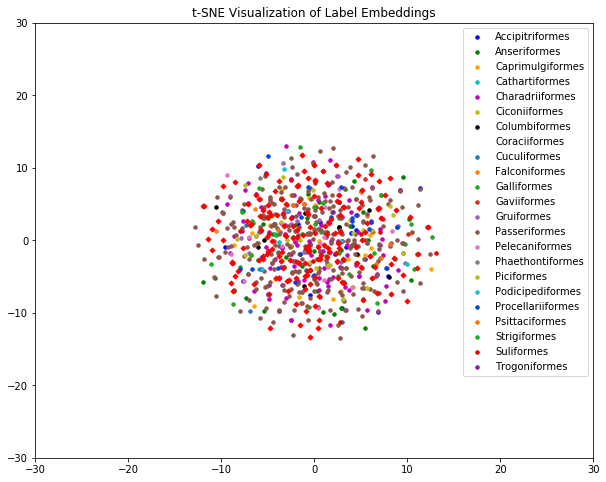

/home/hagerradi/anaconda3/envs/main/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/hagerradi/anaconda3/envs/main/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



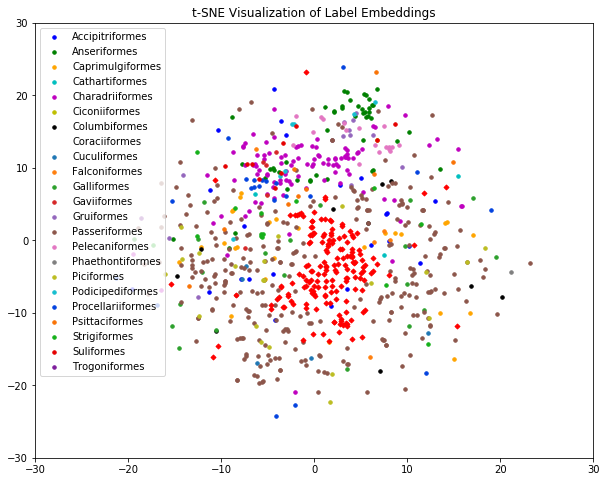

In [61]:
import matplotlib.pyplot as plt

matplotlib_colors = [
    'b', 'g', 'orange', 'c', 'm', 'y', 'k', 'w',
    'tab:blue', 'tab:orange', 'tab:green', 'tab:red',
    'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray',
    'tab:olive', 'tab:cyan', 'xkcd:blue', 'xkcd:orange',
    'xkcd:green', 'xkcd:red', 'xkcd:purple'
]


def plot_embeddings(embeddings):
    tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
    embedded_labels = tsne.fit_transform(embeddings)

    plt.figure(figsize=(10, 8))
    i = 0
    for k, v in per_species_mask.items():
        plt.scatter(embedded_labels[v, 0], embedded_labels[v,1], s=12, color=matplotlib_colors[i], label=k)
        i += 1
        
#     plt.scatter(embedded_labels[:670, 0], embedded_labels[:670, 1], s=10, color='red')
    plt.scatter(embedded_labels[670:, 0], embedded_labels[670:, 1], s=12, color='red', marker='D')

    plt.title("t-SNE Visualization of Label Embeddings")
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.legend()
    plt.show()

what_to_mask = int(np.random.randint(0, mask_max_size, 1)[0])
mask_indices = np.array(list(per_species_mask.values())[what_to_mask])
plot_embeddings(embeddings_random)
plot_embeddings(embeddings_trained)

In [67]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.manifold import TSNE


colormap = plt.cm.get_cmap('tab20c', len(per_species_mask))

colors = [colormap(i) for i in range(len(per_species_mask))]

def plot_embeddings(embeddings):
    tsne = TSNE(n_components=3, perplexity=30, n_iter=300)
    embedded_labels = tsne.fit_transform(embeddings)

    fig = go.Figure()

    matplotlib_colors = px.colors.qualitative.Set1

    i = 0
    for k, v in per_species_mask.items():
        fig.add_trace(go.Scatter3d(
            x=embedded_labels[v, 0], 
            y=embedded_labels[v, 1], 
            z=embedded_labels[v, 2],
            mode='markers',
            marker=dict(size=6, color=colors[i]),
            name=k
        ))
        i += 1

    fig.add_trace(go.Scatter3d(
        x=embedded_labels[670:, 0], 
        y=embedded_labels[670:, 1], 
        z=embedded_labels[670:, 2],
        mode='markers',
        marker=dict(size=6, color='red', symbol='diamond'),
        name='Special Points'
    ))

    fig.update_layout(title_text="3D t-SNE Visualization of Label Embeddings",
                        xaxis=dict(range=[-30, 30]),  # X-axis range
                        yaxis=dict(range=[-30, 30]),  # Y-axis range
                        showlegend=True)
    fig.show()


what_to_mask = int(np.random.randint(0, mask_max_size, 1)[0])
mask_indices = np.array(list(per_species_mask.values())[what_to_mask])
plot_embeddings(embeddings_random)
plot_embeddings(embeddings_trained)

/home/hagerradi/anaconda3/envs/main/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/hagerradi/anaconda3/envs/main/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/home/hagerradi/anaconda3/envs/main/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/hagerradi/anaconda3/envs/main/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

